In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random

In [3]:
SEED = 10028563

In [4]:
songs_df = pd.read_csv('data/SpotifyFeatures.csv')

songs_df.drop(['key', 'mode', 'time_signature', 'popularity', 'genre'], axis=1, inplace=True)

songs_df.head()

,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227
4,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390


In [5]:
song_info_dict = {}

for i, line in songs_df.iterrows():
    key = line['track_id']
    artist_name = line['artist_name']
    track_name = line['track_name']
    
    song_info_dict[key] = [artist_name, track_name]


In [6]:
songs_df.drop(['artist_name', 'track_name'], axis=1, inplace=True)

songs_df

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0BRjO6ga9RKCKjfDqeFgWV,0.61100,0.389,99373,0.910,0.000000,0.3460,-1.828,0.0525,166.969,0.814
1,0BjC1NfoEOOusryehmNudP,0.24600,0.590,137373,0.737,0.000000,0.1510,-5.559,0.0868,174.003,0.816
2,0CoSDzoNIKCRs124s9uTVy,0.95200,0.663,170267,0.131,0.000000,0.1030,-13.879,0.0362,99.488,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,0.70300,0.240,152427,0.326,0.000000,0.0985,-12.178,0.0395,171.758,0.227
4,0IuslXpMROHdEPvSl1fTQK,0.95000,0.331,82625,0.225,0.123000,0.2020,-21.150,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...,...
232720,2XGLdVl7lGeq8ksM6Al7jT,0.00384,0.687,326240,0.714,0.544000,0.0845,-10.626,0.0316,115.542,0.962
232721,1qWZdkBl4UVPj9lK6HuuFM,0.03290,0.785,282447,0.683,0.000880,0.2370,-6.944,0.0337,113.830,0.969
232722,2ziWXUmQLrXTiYjCg2fZ2t,0.90100,0.517,166960,0.419,0.000000,0.0945,-8.282,0.1480,84.135,0.813
232723,6EFsue2YbIG4Qkq8Zr9Rir,0.26200,0.745,222442,0.704,0.000000,0.3330,-7.137,0.1460,100.031,0.489


In [7]:
elbow_test = songs_df.drop(['track_id'], axis=1)

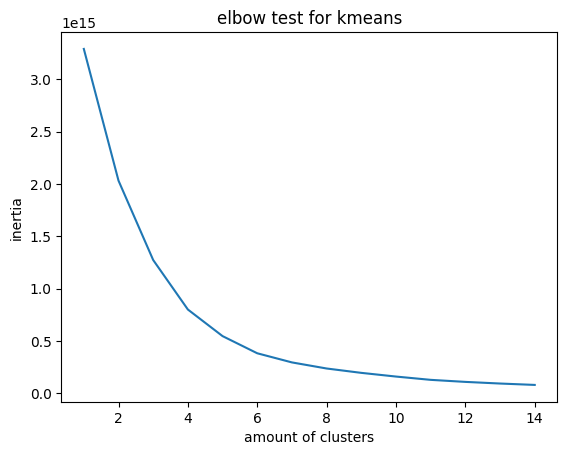

In [8]:
ks = range(1,15)

inertias = []
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init="auto", random_state=SEED)
    kmeans.fit(elbow_test)
    inertias.append(kmeans.inertia_)

plt.plot(ks, inertias)
plt.xlabel('amount of clusters')
plt.ylabel('inertia')
plt.title('elbow test for kmeans')
plt.show()

In [9]:
ELBOW_VALUE=5

In [10]:
songs_df.set_index('track_id', inplace=True)

In [11]:
songs_df

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
track_id,,,,,,,,,,
0BRjO6ga9RKCKjfDqeFgWV,0.61100,0.389,99373,0.910,0.000000,0.3460,-1.828,0.0525,166.969,0.814
0BjC1NfoEOOusryehmNudP,0.24600,0.590,137373,0.737,0.000000,0.1510,-5.559,0.0868,174.003,0.816
0CoSDzoNIKCRs124s9uTVy,0.95200,0.663,170267,0.131,0.000000,0.1030,-13.879,0.0362,99.488,0.368
0Gc6TVm52BwZD07Ki6tIvf,0.70300,0.240,152427,0.326,0.000000,0.0985,-12.178,0.0395,171.758,0.227
0IuslXpMROHdEPvSl1fTQK,0.95000,0.331,82625,0.225,0.123000,0.2020,-21.150,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...
2XGLdVl7lGeq8ksM6Al7jT,0.00384,0.687,326240,0.714,0.544000,0.0845,-10.626,0.0316,115.542,0.962
1qWZdkBl4UVPj9lK6HuuFM,0.03290,0.785,282447,0.683,0.000880,0.2370,-6.944,0.0337,113.830,0.969
2ziWXUmQLrXTiYjCg2fZ2t,0.90100,0.517,166960,0.419,0.000000,0.0945,-8.282,0.1480,84.135,0.813


In [12]:
model = KMeans(n_clusters=ELBOW_VALUE, n_init='auto', random_state=SEED)
model.fit(songs_df)
cluster_labels = model.predict(songs_df)
songs_df['cluster'] = cluster_labels

song_cluster_df = songs_df['cluster'].reset_index()

song_cluster_df

,track_id,cluster
0,0BRjO6ga9RKCKjfDqeFgWV,1
1,0BjC1NfoEOOusryehmNudP,1
2,0CoSDzoNIKCRs124s9uTVy,1
3,0Gc6TVm52BwZD07Ki6tIvf,1
4,0IuslXpMROHdEPvSl1fTQK,1
...,...,...
232720,2XGLdVl7lGeq8ksM6Al7jT,0
232721,1qWZdkBl4UVPj9lK6HuuFM,0
232722,2ziWXUmQLrXTiYjCg2fZ2t,1
232723,6EFsue2YbIG4Qkq8Zr9Rir,0


In [13]:
song_cluster_df.groupby('cluster').count()

,track_id
cluster,
0,121208
1,87597
2,1643
3,22172
4,105


In [14]:
clusters_dict = {k:[] for k in range(0,5)}

for i,line in song_cluster_df.iterrows():
    id = line['track_id']
    cluster = line['cluster']
    clusters_dict[cluster].append(id)

In [15]:
for key, value in clusters_dict.items():
    print("\n")
    random_elements = random.sample(value, 5)
    
    songs = []
    
    print(f"Cluster {key}: ")
    
    for id in random_elements:
        search = song_info_dict[id]
        artist = search[0]
        song = search[1]
        text = f"{artist} --- {song}"
        print(text)



Cluster 0: 
Radiohead --- 15 Step
Falcom Sound Team jdk --- Ashita E No Kodou
Kayzo --- Fired Up (feat. Nina Sung) - Synchronice Remix
The Paper Kites --- A Silent Cause
Kid Cudi --- Brothers


Cluster 1: 
goosetaf --- Washing Away
The Skints --- Fm: Dancehall Dilemmas with Dr. Ranking Pegasus
Juice Music --- Bedtime Song
Comethazine --- Bring Dat Bag Out (feat. Lil Yachty)
Mandy Moore --- I've Got a Dream - From "Tangled"/Soundtrack Version


Cluster 2: 
Sergei Rachmaninoff --- Symphony No. 2: III. Adagio
Brad Mehldau Trio --- Since I Fell for You
Widespread Panic --- Space Wrangler - Live
Trent Reznor --- At Risk
Dane Cook --- The Game of Love And How To Destroy It


Cluster 3: 
The Who --- Eminence Front
Martha Argerich --- Concierto Para Piano Y Orquesta Nº 1, En Mi Menor Op.11 - Rondo. Vivace
John Williams --- The Last Battle - From "Saving Private Ryan" Soundtrack
Jerry Garcia --- Sugaree
LCD Soundsystem --- New York, I Love You But You're Bringing Me Down


Cluster 4: 
Michel 

In [16]:
cluster0 = songs_df[songs_df['cluster']==0]
cluster1 = songs_df[songs_df['cluster']==1]
cluster2 = songs_df[songs_df['cluster']==2]
cluster3 = songs_df[songs_df['cluster']==3]
cluster4 = songs_df[songs_df['cluster']==4]
cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness' , 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
dfs = [cluster0, cluster1, cluster2, cluster3, cluster4 ]
cluster_avgs = {k:{} for k in range(0,5)}

count = 0
for df in dfs:
    for col in cols:
        cluster_avgs[count][col] = df[col].mean()
    count +=1
        


final_df = pd.DataFrame(cluster_avgs).transpose()

final_df

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.300253,0.569531,2.483099e+05,0.611221,0.107609,0.202838,-8.404218,0.103652,118.929848,0.458614
1,0.430113,0.561103,1.576062e+05,0.541031,0.162795,0.221332,-10.372890,0.141896,116.953710,0.485742
2,0.733421,0.341041,8.708091e+05,0.332041,0.451400,0.272306,-16.676591,0.182152,103.609363,0.219796
3,0.470182,0.460764,4.085677e+05,0.487274,0.291072,0.251656,-12.224789,0.124068,114.740348,0.330294
4,0.701341,0.527154,3.108208e+06,0.468867,0.139808,0.354840,-13.441943,0.589096,91.996410,0.465995
